In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import logging
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from docopt import docopt

In [ ]:
import seaborn as sns
sns.set_style("dark")
sns.set(font_scale=1)
plt.rcParams["figure.figsize"] = (20,7)

In [ ]:
tata_steel=pd.read_csv("/content/drive/MyDrive/Tata-steel.csv")

In [ ]:
tata_steel.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


In [ ]:
tata_steel.shape

(1485, 13)

In [ ]:
tata_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1485 non-null   object 
 1   Open Price                 1485 non-null   float64
 2   High Price                 1485 non-null   float64
 3   Low Price                  1485 non-null   float64
 4   Close Price                1485 non-null   float64
 5   WAP                        1485 non-null   float64
 6   No.of Shares               1485 non-null   int64  
 7   No. of Trades              1485 non-null   int64  
 8   Total Turnover (Rs.)       1485 non-null   int64  
 9   Deliverable Quantity       1484 non-null   float64
 10  % Deli. Qty to Traded Qty  1484 non-null   float64
 11  Spread High-Low            1485 non-null   float64
 12  Spread Close-Open          1485 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

In [ ]:
tata_steel.isna().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

In [ ]:
tata_steel.duplicated().sum()

0

In [ ]:
tata_steel.describe().round(2)

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,1485.00,1485.00,1485.00,1485.00,1485.00,1485.00,1485.00,1.485000e+03,1484.00,1484.00,1485.00,1485.00
mean,486.57,494.06,478.73,486.23,486.57,797650.78,10493.15,3.715847e+08,158950.69,19.56,15.34,-0.35
std,187.05,189.64,184.18,187.01,187.01,488732.40,6684.56,2.946512e+08,151172.34,9.97,9.85,10.85
min,205.05,206.25,200.00,201.35,202.94,54977.00,1000.00,2.522744e+07,19608.00,2.93,1.80,-56.90
25%,355.65,360.55,346.70,354.25,354.53,472687.00,6231.00,2.148535e+08,70989.25,12.90,9.10,-6.30
50%,470.55,477.00,463.35,469.55,469.53,680474.00,8790.00,2.911989e+08,113615.50,16.94,12.75,-0.50
75%,581.00,587.50,572.10,579.80,580.22,981485.00,12930.00,4.212425e+08,188365.25,22.99,18.35,4.95
max,1231.00,1246.80,1200.00,1233.90,1215.99,5089559.00,63054.00,3.514542e+09,1779684.00,75.79,88.45,53.35


In [ ]:
tata_steel["Date"]=pd.to_datetime(tata_steel["Date"])

In [ ]:
tata_steel['Month']=tata_steel["Date"].dt.month
tata_steel['Year']=tata_steel["Date"].dt.year
tata_steel['Day']=tata_steel["Date"].dt.day

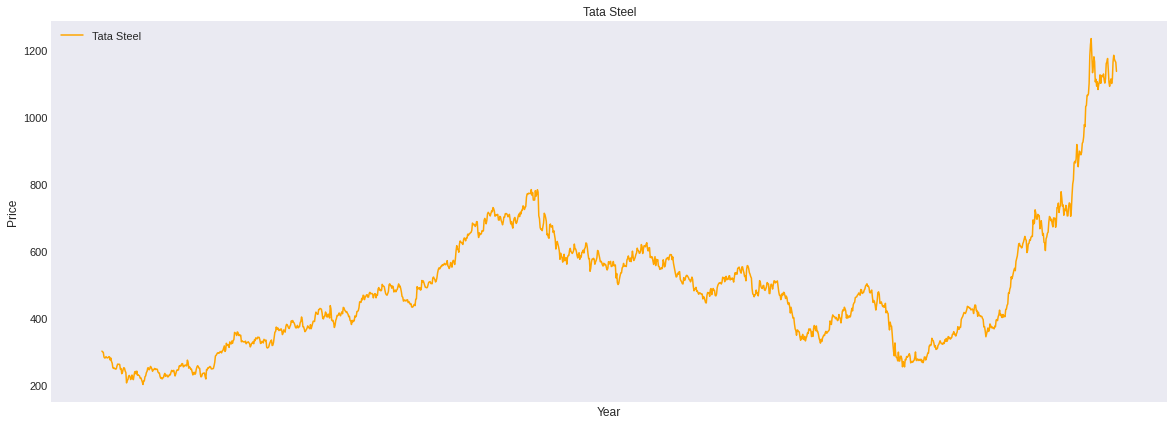

In [ ]:
plt.figure(figsize=(20,7))
plt.style.use("seaborn-dark")
plt.plot(tata_steel['Date'],tata_steel['Close Price'],color='orange',label='Tata Steel')
plt.xticks([])
plt.title( "Tata Steel")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend(title="")
plt.show()

In [ ]:
class StockPredictor(object):
    def __init__(self, company, test_size=0.25,
                 n_hidden_states=4, n_latency_days=10,
                 n_steps_frac_change=50, n_steps_frac_high=10,
                 n_steps_frac_low=10):
        self._init_logger()

        self.company = company
        self.n_latency_days = n_latency_days

        self.hmm = GaussianHMM(n_components=n_hidden_states)

        self._split_train_test_data(test_size)

        self._compute_all_possible_outcomes(
            n_steps_frac_change, n_steps_frac_high, n_steps_frac_low)

    def _init_logger(self):
        self._logger = logging.getLogger(__name__)
        handler = logging.StreamHandler()
        formatter = logging.Formatter(
            '%(asctime)s %(name)-12s %(levelname)-8s %(message)s')
        handler.setFormatter(formatter)
        self._logger.addHandler(handler)
        self._logger.setLevel(logging.DEBUG)

    def _split_train_test_data(self, test_size):
        data = pd.read_csv(
            '/content/drive/MyDrive/Tata-steel.csv'.format(company=self.company))
        _train_data, test_data = train_test_split(
            data, test_size=test_size, shuffle=False)

        self._train_data = _train_data
        self._test_data = test_data

    @staticmethod
    def _extract_features(data):
        open_price = np.array(data['Open Price'])
        close_price = np.array(data['Close Price'])
        high_price = np.array(data['High Price'])
        low_price = np.array(data['Low Price'])

      
        frac_change = (close_price - open_price) / open_price
        frac_high = (high_price - open_price) / open_price
        frac_low = (open_price - low_price) / open_price

        return np.column_stack((frac_change, frac_high, frac_low))

    def fit(self):
        self._logger.info('>>> Extracting Features')
        feature_vector = StockPredictor._extract_features(self._train_data)
        self._logger.info('Features extraction Completed <<<')

        self.hmm.fit(feature_vector)

    def _compute_all_possible_outcomes(self, n_steps_frac_change,
                                       n_steps_frac_high, n_steps_frac_low):
        frac_change_range = np.linspace(-0.1, 0.1, n_steps_frac_change)
        frac_high_range = np.linspace(0, 0.1, n_steps_frac_high)
        frac_low_range = np.linspace(0, 0.1, n_steps_frac_low)

        self._possible_outcomes = np.array(list(itertools.product(
            frac_change_range, frac_high_range, frac_low_range)))

    def _get_most_probable_outcome(self, day_index):
        previous_data_start_index = max(0, day_index - self.n_latency_days)
        previous_data_end_index = max(0, day_index - 1)
        previous_data = self._test_data.iloc[previous_data_end_index: previous_data_start_index]
        previous_data_features = StockPredictor._extract_features(
            previous_data)

        outcome_score = []
        for possible_outcome in self._possible_outcomes:
            total_data = np.row_stack(
                (previous_data_features, possible_outcome))
            outcome_score.append(self.hmm.score(total_data))
        most_probable_outcome = self._possible_outcomes[np.argmax(
            outcome_score)]

        return most_probable_outcome

    def predict_close_price(self, day_index):
        open_price = self._test_data.iloc[day_index]['Open Price']
        predicted_frac_change, _, _ = self._get_most_probable_outcome(
            day_index)
        return open_price * (1 + predicted_frac_change)

    def predict_close_prices_for_days(self, days, with_plot=False):
        predicted_close_prices = []
        for day_index in tqdm(range(days)):
            predicted_close_prices.append(self.predict_close_price(day_index))

        if with_plot:

            test_data = self._test_data[0: days]
            days = np.array(test_data['Date'])
            actual_close_prices = test_data['Close Price']

            fig = plt.figure()

            axes = fig.add_subplot(111)
            axes.plot(days, actual_close_prices, 'bo-', label="actual")
            axes.plot(days, predicted_close_prices, 'r+-', label="predicted")
            axes.set_title('{company}'.format(company=self.company))
            plt.xlabel("Date")
            plt.ylabel("Price")
            
            #axes.set_xticklabels([])
            #plt.style.use("seaborn-dark")

            fig.autofmt_xdate()

            plt.legend()
            plt.show()

            MSE =  mean_squared_error(actual_close_prices, predicted_close_prices)
            RMSE = mean_squared_error(actual_close_prices, predicted_close_prices, squared=False)
            print('MSE  :',MSE)
            print('RMSE :',RMSE)
    
        return predicted_close_prices 

2022-07-13 14:35:53,810 __main__     INFO     >>> Extracting Features
2022-07-13 14:35:53,810 __main__     INFO     >>> Extracting Features
2022-07-13 14:35:53,819 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:35:53,819 __main__     INFO     Features extraction Completed <<<
100%|██████████| 50/50 [01:26<00:00,  1.74s/it]


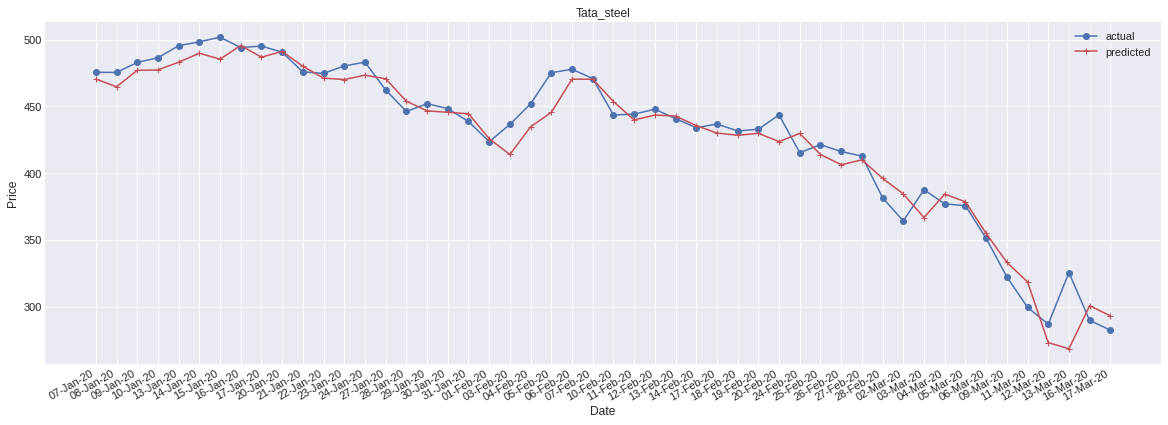

MSE  : 185.84497828571418
RMSE : 13.632497140499028


[470.58,
 464.76428571428573,
 477.0857142857143,
 477.3814285714286,
 483.19714285714286,
 489.90000000000003,
 485.4642857142857,
 495.7157142857143,
 486.9428571428572,
 491.28000000000003,
 480.1414285714286,
 471.27000000000004,
 470.1857142857143,
 473.4878571428572,
 470.7771428571429,
 453.9214285714286,
 446.7257142857143,
 445.6414285714286,
 444.5571428571429,
 425.8285714285714,
 414.0,
 434.79857142857145,
 445.5921428571429,
 470.4814285714286,
 470.4321428571429,
 453.72428571428577,
 439.875,
 443.5714285714286,
 442.83214285714286,
 435.6857142857143,
 430.06714285714287,
 428.3914285714286,
 429.87000000000006,
 423.7092857142858,
 429.7714285714286,
 413.9507142857143,
 406.3607142857143,
 409.9585714285714,
 396.1585714285714,
 384.42857142857144,
 366.735,
 384.28071428571434,
 378.51428571428573,
 354.8571428571429,
 333.1714285714286,
 318.48428571428576,
 272.9442857142857,
 268.3607142857143,
 300.64285714285717,
 293.00357142857143]

In [ ]:
stock_predictor = StockPredictor(company="Tata_steel")
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(50, with_plot=True)

2022-07-13 14:39:26,903 __main__     INFO     >>> Extracting Features
2022-07-13 14:39:26,903 __main__     INFO     >>> Extracting Features
2022-07-13 14:39:26,903 __main__     INFO     >>> Extracting Features
2022-07-13 14:39:26,912 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:39:26,912 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:39:26,912 __main__     INFO     Features extraction Completed <<<
100%|██████████| 100/100 [02:41<00:00,  1.61s/it]


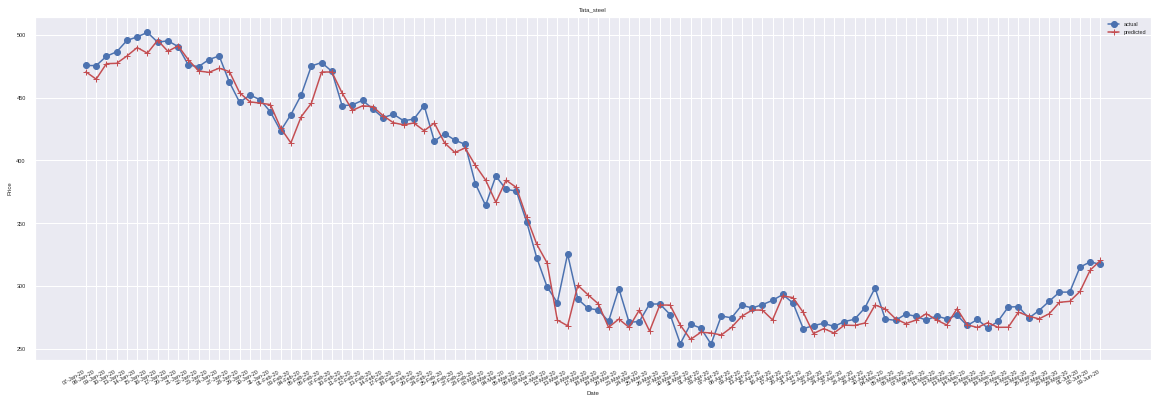

MSE  : 135.37923192857133
RMSE : 11.635258137599326


[470.58,
 464.76428571428573,
 477.0857142857143,
 477.3814285714286,
 483.19714285714286,
 489.90000000000003,
 485.4642857142857,
 495.7157142857143,
 486.9428571428572,
 491.28000000000003,
 480.1414285714286,
 471.27000000000004,
 470.1857142857143,
 473.4878571428572,
 470.7771428571429,
 453.9214285714286,
 446.7257142857143,
 445.6414285714286,
 444.5571428571429,
 425.8285714285714,
 414.0,
 434.79857142857145,
 445.5921428571429,
 470.4814285714286,
 470.4321428571429,
 453.72428571428577,
 439.875,
 443.5714285714286,
 442.83214285714286,
 435.6857142857143,
 430.06714285714287,
 428.3914285714286,
 429.87000000000006,
 423.7092857142858,
 429.7714285714286,
 413.9507142857143,
 406.3607142857143,
 409.9585714285714,
 396.1585714285714,
 384.42857142857144,
 366.735,
 384.28071428571434,
 378.51428571428573,
 354.8571428571429,
 333.1714285714286,
 318.48428571428576,
 272.9442857142857,
 268.3607142857143,
 300.64285714285717,
 293.00357142857143,
 285.8571428571429,
 267.12

In [ ]:
stock_predictor = StockPredictor(company="Tata_steel")
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(100, with_plot=True)

2022-07-13 14:44:30,377 __main__     INFO     >>> Extracting Features
2022-07-13 14:44:30,377 __main__     INFO     >>> Extracting Features
2022-07-13 14:44:30,377 __main__     INFO     >>> Extracting Features
2022-07-13 14:44:30,377 __main__     INFO     >>> Extracting Features
2022-07-13 14:44:30,389 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:44:30,389 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:44:30,389 __main__     INFO     Features extraction Completed <<<
2022-07-13 14:44:30,389 __main__     INFO     Features extraction Completed <<<
100%|██████████| 370/370 [09:51<00:00,  1.60s/it]


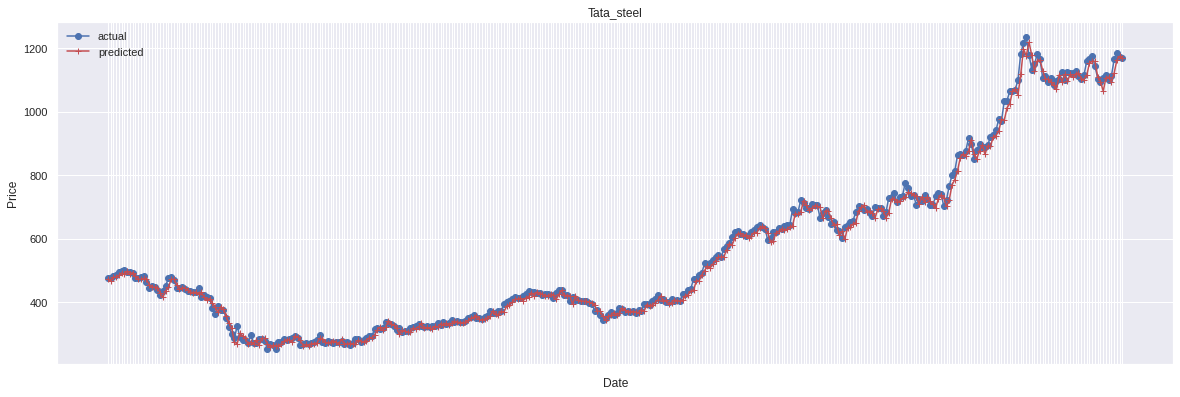

MSE  : 265.2328640156973
RMSE : 16.285971386923695


[472.5285714285714,
 466.6887755102041,
 479.0612244897959,
 479.35816326530613,
 485.19795918367345,
 491.92857142857144,
 487.4744897959184,
 497.76836734693876,
 488.9591836734694,
 493.3142857142857,
 482.12959183673473,
 473.2214285714286,
 472.13265306122446,
 475.4484693877551,
 472.7265306122449,
 455.80102040816325,
 448.57551020408164,
 447.48673469387757,
 446.3979591836735,
 427.59183673469386,
 415.7142857142857,
 436.5989795918368,
 447.4372448979592,
 472.4295918367347,
 472.3801020408163,
 455.6030612244898,
 441.69642857142856,
 445.40816326530614,
 444.6658163265306,
 437.48979591836735,
 431.8479591836735,
 430.165306122449,
 431.65000000000003,
 425.4637755102041,
 431.55102040816325,
 415.6647959183673,
 408.0433673469388,
 411.65612244897954,
 397.7989795918367,
 386.0204081632653,
 368.25357142857143,
 385.8719387755102,
 380.0816326530612,
 356.3265306122449,
 334.55102040816325,
 319.8030612244898,
 274.07448979591834,
 269.4719387755102,
 301.8877551020408,
 2

In [ ]:
stock_predictor = StockPredictor(company="Tata_steel")
stock_predictor.fit()
stock_predictor.predict_close_prices_for_days(370, with_plot=True)